English is not my first language so sorry for any error. 

Please, give me your feedback and if you like my kernel, <b>votesup  </b>.

# Table of Contents:

**1. [Objective and Introduction](#Introduction)** <br>
**2. [Librarys](#Librarys)** <br>
**3. [First Look](#Known)** <br>
**4. [Explorations](#Explore)** <br>
**5. [Observations](#Observations)** <br>
**6. [EDA Flavors and Effects](#FlavandEffect)** <br>
**7. [Preprocessing](#Preprocess)** <br>
**8. [Modeling](#Modeling)** <br>
**9. [Evaluation](#Evaluation)** <br>

<b>Let's start this Analysis.</b>



# **1. Introduction:** <a id="Introduction"></a> <br> 


<h3>This exploration wants discover the effects and flavors related to cananbis types. I will use the Rating column as guide to exploration.</h3>

<b><h1>Introduction</h1></b>

<b>Cannabis</b>, also known as marijuana among other names,[n 1] is a psychoactive drug from the Cannabis plant intended for medical or recreational use. The main psychoactive part of cannabis is tetrahydrocannabinol (THC); one of 483 known compounds in the plant, including at least 65 other cannabinoids. Cannabis can be used by smoking, vaporizing, within food, or as an extract.

Cannabis is often used for its <b>mental and physical effects</b>, such as a <b>"high" or "stoned" </b>feeling, a general change in perception, euphoria (heightened mood), and an increase in appetite.Onset of effects is within minutes when smoked, and about 30 to 60 minutes when cooked and eaten.They last for between two and six hours. Short-term side effects may include a decrease in short-term memory, dry mouth, impaired motor skills, red eyes, and feelings of paranoia or anxiety. Long-term side effects may include addiction, decreased mental ability in those who started as teenagers, and behavioral problems in children whose mothers used cannabis during pregnancy. Studies have found a strong relation between cannabis use and the risk of psychosis,though the cause-and-effect relationship is debated.


<a id="Librarys"></a> <br> 
# **2. Librarys and import:** 

In [51]:
import pandas as pd # to dataframes
import matplotlib.pyplot as plt #to define plot parameters
import seaborn as sns #to graphical plots
import numpy as np #to math 

plt.style.use('ggplot') # to plot graphs with gggplot2 style

In [52]:
#Reading the dataset on pandas
strains = pd.read_csv("../input/cannabis.csv")

<a id="Known"></a> <br> 
# **3. Knowning the Data:** 

In [53]:
# Veryfing the shape, if have any null numbers and looking how the data is
print(strains.shape)
print(strains.isnull().sum())
print(strains.info())
strains.head(n=6)

(2351, 6)
Strain          0
Type            0
Rating          0
Effects         0
Flavor         46
Description    33
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2351 entries, 0 to 2350
Data columns (total 6 columns):
Strain         2351 non-null object
Type           2351 non-null object
Rating         2351 non-null float64
Effects        2351 non-null object
Flavor         2305 non-null object
Description    2318 non-null object
dtypes: float64(1), object(5)
memory usage: 110.3+ KB
None


,Strain,Type,Rating,Effects,Flavor,Description
0,100-Og,hybrid,4.0,"Creative,Energetic,Tingly,Euphoric,Relaxed","Earthy,Sweet,Citrus",$100 OG is a 50/50 hybrid strain that packs a ...
1,98-White-Widow,hybrid,4.7,"Relaxed,Aroused,Creative,Happy,Energetic","Flowery,Violet,Diesel",The ‘98 Aloha White Widow is an especially pot...
2,1024,sativa,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy/Herbal,Sage,Woody",1024 is a sativa-dominant hybrid bred in Spain...
3,13-Dawgs,hybrid,4.2,"Tingly,Creative,Hungry,Relaxed,Uplifted","Apricot,Citrus,Grapefruit",13 Dawgs is a hybrid of G13 and Chemdawg genet...
4,24K-Gold,hybrid,4.6,"Happy,Relaxed,Euphoric,Uplifted,Talkative","Citrus,Earthy,Orange","Also known as Kosher Tangie, 24k Gold is a 60%..."
5,3-Bears-Og,indica,0.0,None,None,3 Bears OG by Mephisto Genetics is an autoflow...


In [54]:
strains['Type'] = strains.Type.astype(str)
#Here looking though the data to see the structure
print(strains.nunique())

Strain         2350
Type              3
Rating           26
Effects        1655
Flavor         1293
Description    2312
dtype: int64


<a id="Explore"></a> <br> 
# **4. Data Exploration:** 

Knowning the Frequency of types in our dataset

Numerical describe of distribuition Type
Type
hybrid    1212
indica     699
sativa     440
Name: Strain, dtype: int64
Percentage of distribuition Type 
Type
hybrid    51.55
indica    29.73
sativa    18.72
Name: Strain, dtype: float64


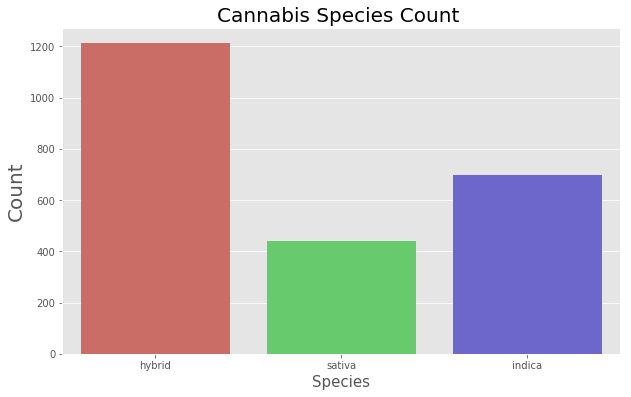

In [55]:
#First, I will look the distribuition of Types
print("Numerical describe of distribuition Type")
print(strains.groupby("Type")["Strain"].count())
print("Percentage of distribuition Type ")
print((strains.groupby("Type")["Strain"].count() / len(strains.Type) * 100).round(decimals=2))

plt.figure(figsize=(10,6))
sns.countplot(x="Type", data=strains, palette='hls')
plt.xlabel('Species', fontsize=15)
plt.ylabel('Count', fontsize=20)
plt.title("Cannabis Species Count ", fontsize=20)
plt.show()

<h2>Looking the distribuition of Rating and type by Rating</h2>

Top 10 Rating by consumers
4.5    317
4.3    297
4.4    284
4.6    242
4.2    225
5.0    210
4.7    164
4.8    159
4.0    104
4.1    101
Name: Rating, dtype: int64


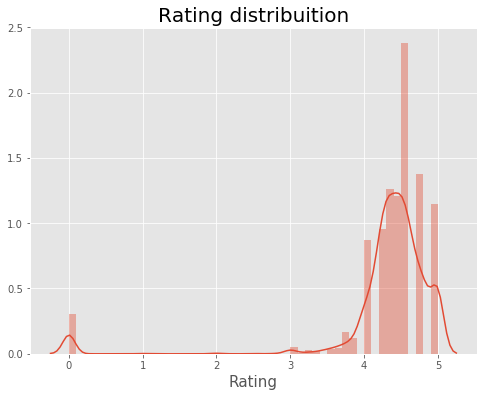

In [56]:
print("Top 10 Rating by consumers")
print(strains["Rating"].value_counts().head(10))

plt.figure(figsize=(8,6))

#Total rating distribuition
g = sns.distplot(strains["Rating"], bins=50)
g.set_title("Rating distribuition", size = 20)
g.set_xlabel('Rating', fontsize=15)

plt.show()

Almost all species have rating higher than 4<br>

Now I will Look the distribuition separted by Type

Rating Distribuition by Species Type
Type    hybrid  indica  sativa
Rating                        
4.1         56      33      12
4.2        113      64      48
4.3        150      89      58
4.4        144      83      57
4.5        164      94      59
4.6        114      78      50
4.7         95      47      22
4.8         88      41      30
4.9         31      19       9
5.0        102      70      38


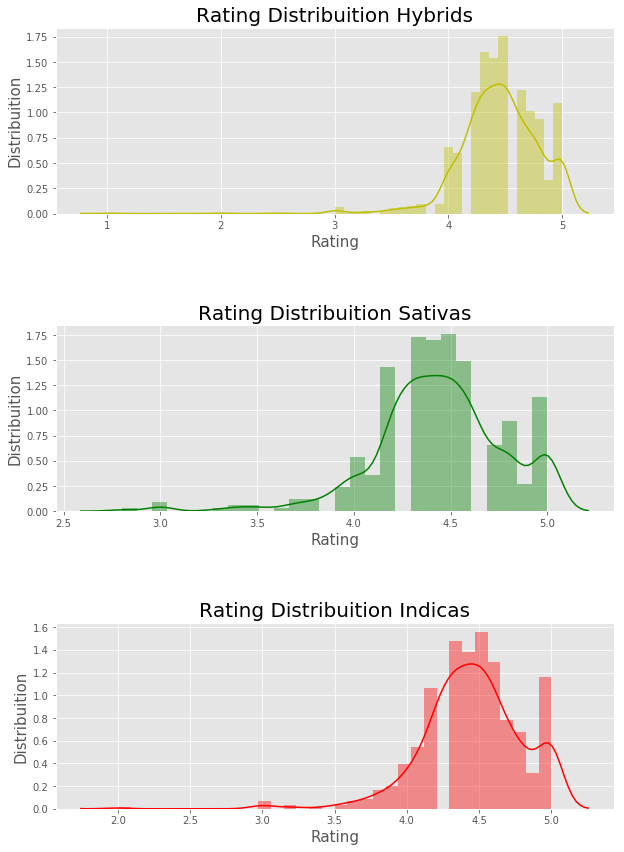

In [57]:
print("Rating Distribuition by Species Type")
print(pd.crosstab(strains[strains.Rating > 4.0]['Rating'], strains.Type))

plt.figure(figsize=(10,14))

#Let's look the Rating distribuition by Type.
g = plt.subplot(311)
g = sns.distplot(strains[(strains.Type == 'hybrid') & 
                               (strains.Rating > 0)]["Rating"], color='y')
g.set_xlabel("Rating", fontsize=15)
g.set_ylabel("Distribuition", fontsize=15)
g.set_title("Rating Distribuition Hybrids", fontsize=20)

g1 = plt.subplot(312)
g1 = sns.distplot(strains[(strains.Type == 'sativa') & 
                               (strains.Rating > 0)]["Rating"], color='g')
g1.set_xlabel("Rating", fontsize=15)
g1.set_ylabel("Distribuition", fontsize=15)
g1.set_title("Rating Distribuition Sativas", fontsize=20)

g2 = plt.subplot(313)
g2 = sns.distplot(strains[(strains.Type == 'indica') & 
                               (strains.Rating > 0)]["Rating"], color='r')
g2.set_xlabel("Rating", fontsize=15)
g2.set_ylabel("Distribuition", fontsize=15)
g2.set_title("Rating Distribuition Indicas", fontsize=20)

plt.subplots_adjust(wspace = 0.1, hspace = 0.6,top = 0.9)

plt.show()


<h1>Reggae colors looks good on this dataset LOL :D</h1>

Sativa and Indica have a similar rating distribuition, and we can see that almost of all species in dataset have rating higher than 4

<h2>Lets try a better look of the Rating Distribuition by species considering just the values higher than 2</h2>

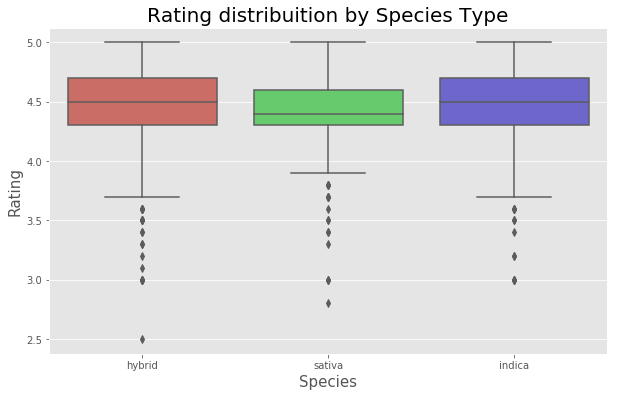

In [58]:
plt.figure(figsize=(10,6))
#I will now explore the Rating distribuition by Type
g = sns.boxplot(x="Type",y="Rating",data=strains[strains["Rating"] > 2],palette="hls")
g.set_title("Rating distribuition by Species Type", fontsize=20)
g.set_xlabel("Species", fontsize=15)
g.set_ylabel("Rating", fontsize=15)
plt.show()

WE can see that the Sativa have a less median than Hybrids and indicas

In [59]:
#Looking the Rating distribuition description 
print("Rating less than 4: ")
print(strains[strains.Rating <= 4].groupby("Type")["Strain"].count())
print("Rating between 4 and 4.5: ")
print(strains[(strains.Rating > 4) & (strains.Rating <= 4.5)].groupby("Type")["Strain"].count())
print("Top Strains - Rating > 4.5: ")
print(strains[strains["Rating"] > 4.5].groupby("Type")["Strain"].count())
print("Distribuition by type of Ratings equal 5: ")
print(strains[strains["Rating"] == 5].groupby("Type")["Strain"].count())
print("Total of: 2350 different Strains")

Rating less than 4: 
Type
hybrid    155
indica     81
sativa     57
Name: Strain, dtype: int64
Rating between 4 and 4.5: 
Type
hybrid    627
indica    363
sativa    234
Name: Strain, dtype: int64
Top Strains - Rating > 4.5: 
Type
hybrid    430
indica    255
sativa    149
Name: Strain, dtype: int64
Distribuition by type of Ratings equal 5: 
Type
hybrid    102
indica     70
sativa     38
Name: Strain, dtype: int64
Total of: 2350 different Strains


In [60]:
#I will extract the values in Effects and Flavor and pass to a new column
df_effect = pd.DataFrame(strains.Effects.str.split(',',4).tolist(),
             columns = ['Effect_1','Effect_2','Effect_3','Effect_4','Effect_5'])

df_flavors = pd.DataFrame(strains.Flavor.str.split(',',n=2,expand=True).values.tolist(),
                          columns = ['Flavor_1','Flavor_2','Flavor_3'])

In [61]:
#Concatenating the new variables with strains
strains = pd.concat([strains, df_effect], axis=1)
strains = pd.concat([strains, df_flavors], axis=1)

#Looking the result
strains.head()

strains.columns

Index(['Strain', 'Type', 'Rating', 'Effects', 'Flavor', 'Description',
       'Effect_1', 'Effect_2', 'Effect_3', 'Effect_4', 'Effect_5', 'Flavor_1',
       'Flavor_2', 'Flavor_3'],
      dtype='object')

We can se the Effects and Flavors are in separated columns... Now I will explore the main related effects

<h1>The first most related effects and respective Rating

The top 5 First Effects related
Relaxed     825
Happy       476
Euphoric    249
Uplifted    244
Sleepy       89
Name: Effect_1, dtype: int64


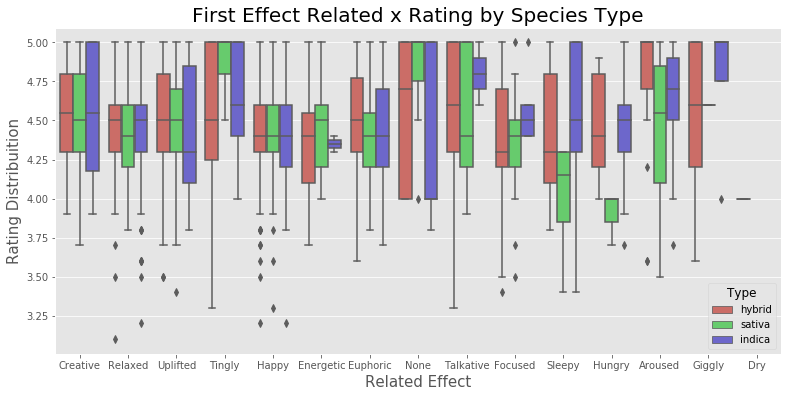

In [62]:
print("The top 5 First Effects related")
print(strains['Effect_1'].value_counts()[:5])

plt.figure(figsize=(13,6))

g = sns.boxplot(x = 'Effect_1', y="Rating",
                hue="Type",
                data=strains[strains["Rating"] > 3],
                palette="hls")
g.set_xlabel("Related Effect", fontsize=15)
g.set_ylabel("Rating Distribuition", fontsize=15)
g.set_title("First Effect Related x Rating by Species Type",fontsize=20)

plt.show()

<h1>The second most related effects and respective Rating

The top 5 Second related Effects
Happy       571
Relaxed     351
Euphoric    342
Uplifted    321
Sleepy      197
Name: Effect_2, dtype: int64


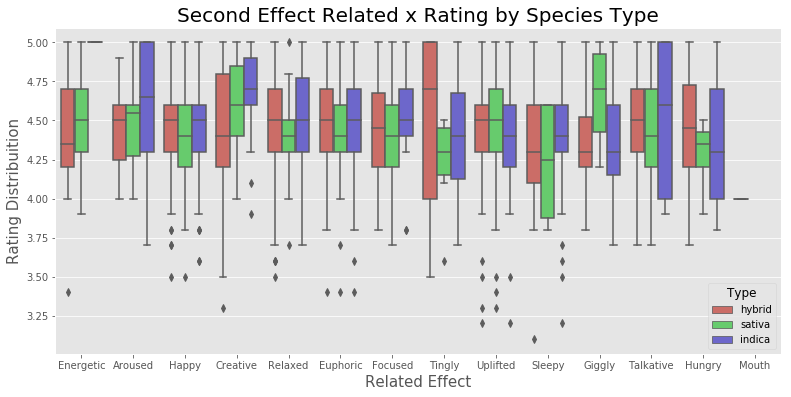

In [63]:
print("The top 5 Second related Effects")
print(strains['Effect_2'].value_counts()[:5])

plt.figure(figsize=(13,6))

g = sns.boxplot(x = 'Effect_2', y="Rating",
                hue="Type",
                data=strains[strains["Rating"] > 3],
                palette="hls")
g.set_xlabel("Related Effect", fontsize=15)
g.set_ylabel("Rating Distribuition", fontsize=15)
g.set_title("Second Effect Related x Rating by Species Type",fontsize=20)

plt.show()

<h1>Now let's see the first Flavor related  </h1><br>
We have 33 flavors in total

In [64]:
strains.head()

,Strain,Type,Rating,Effects,Flavor,Description,Effect_1,Effect_2,Effect_3,Effect_4,Effect_5,Flavor_1,Flavor_2,Flavor_3
0,100-Og,hybrid,4.0,"Creative,Energetic,Tingly,Euphoric,Relaxed","Earthy,Sweet,Citrus",$100 OG is a 50/50 hybrid strain that packs a ...,Creative,Energetic,Tingly,Euphoric,Relaxed,Earthy,Sweet,Citrus
1,98-White-Widow,hybrid,4.7,"Relaxed,Aroused,Creative,Happy,Energetic","Flowery,Violet,Diesel",The ‘98 Aloha White Widow is an especially pot...,Relaxed,Aroused,Creative,Happy,Energetic,Flowery,Violet,Diesel
2,1024,sativa,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy/Herbal,Sage,Woody",1024 is a sativa-dominant hybrid bred in Spain...,Uplifted,Happy,Relaxed,Energetic,Creative,Spicy/Herbal,Sage,Woody
3,13-Dawgs,hybrid,4.2,"Tingly,Creative,Hungry,Relaxed,Uplifted","Apricot,Citrus,Grapefruit",13 Dawgs is a hybrid of G13 and Chemdawg genet...,Tingly,Creative,Hungry,Relaxed,Uplifted,Apricot,Citrus,Grapefruit
4,24K-Gold,hybrid,4.6,"Happy,Relaxed,Euphoric,Uplifted,Talkative","Citrus,Earthy,Orange","Also known as Kosher Tangie, 24k Gold is a 60%...",Happy,Relaxed,Euphoric,Uplifted,Talkative,Citrus,Earthy,Orange


<h2>Exploring Flavors</h2>

TOP 10 Flavors related
Earthy          531
Sweet           414
Citrus          188
Berry           124
None            110
Diesel          108
Pungent          87
Lemon            67
Spicy/Herbal     67
Blueberry        66
Name: Flavor_1, dtype: int64


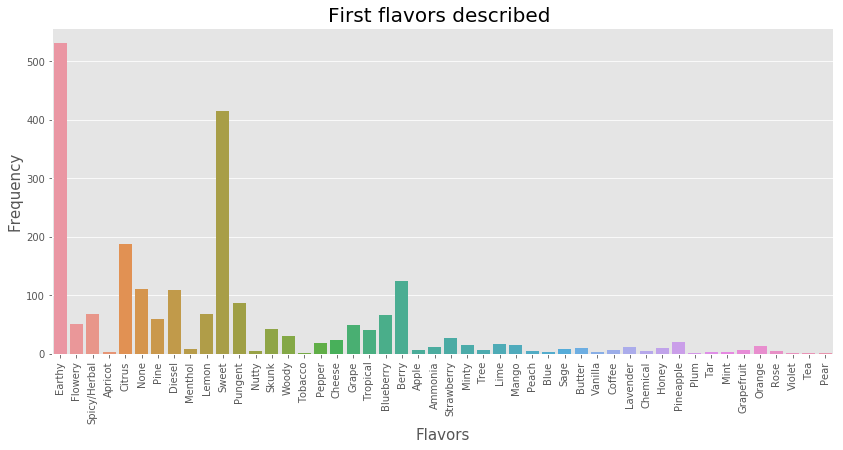

In [65]:
print("TOP 10 Flavors related")
print(strains.Flavor_1.value_counts()[:10])

plt.figure(figsize=(14,6))
sns.countplot('Flavor_1', data=strains)
plt.xticks(rotation=90)
plt.xlabel('Flavors', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title("First flavors described ", fontsize=20)
plt.show()

<h1>Let's explore the Strains with Rating equal 5

Percentual of Species with Rating equal 5
Type
hybrid    48.57
indica    33.33
sativa    18.10
Name: Strain, dtype: float64


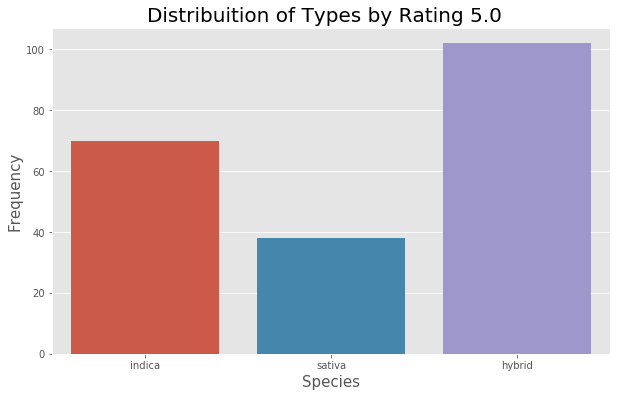

In [66]:
#Whats the type with most strains with rating 5?
print("Percentual of Species with Rating equal 5")
five_rating = (strains[strains["Rating"] == 5].groupby("Type")["Strain"].count() \
               / len(strains[strains["Rating"] == 5]) *100).round(decimals=2)
print(five_rating)
plt.figure(figsize=(10,6))
g = sns.countplot(x="Type",data=strains[strains["Rating"] == 5])
g.set_xlabel('Species', fontsize=15)
g.set_ylabel('Frequency', fontsize=15)
g.set_title("Distribuition of Types by Rating 5.0  ", fontsize=20)

plt.show()

<h2>Exploring the principal effects and Flavors Related in Rating five strains</h2>

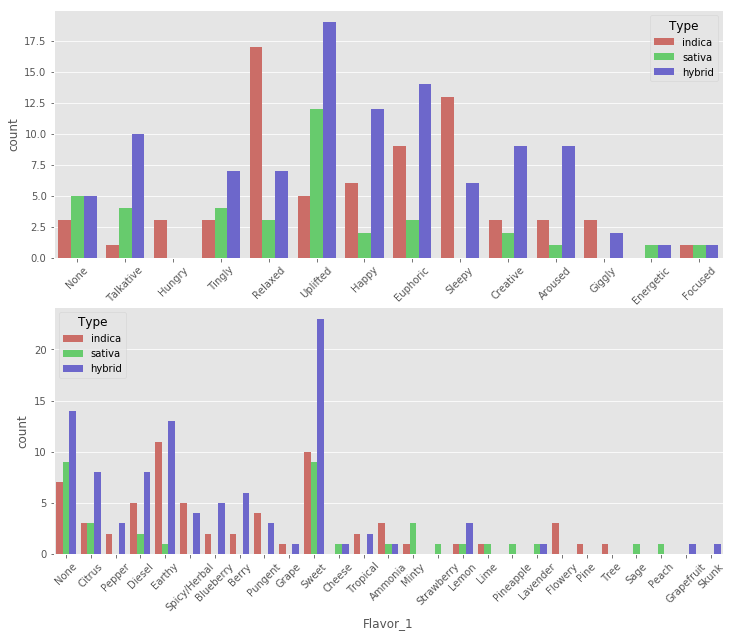

In [67]:
strains_top = strains[strains["Rating"] == 5]

fig, ax = plt.subplots(2,1, figsize=(12,10))

sns.countplot(x ='Effect_1',data = strains_top,hue="Type",ax=ax[0], palette='hls')

sns.countplot(x ='Flavor_1',data = strains_top,hue="Type",ax=ax[1], palette='hls')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=45)

<b> Curious! </b> <br>
We can see that in all types, the most related flavors are Sweet and Earthly. <br>
Is important to remember that we have alot of another flavors that are related with this Sweet and Earthly tastes. <br>

We can also remember that the first cannabis strain was Skunk #1, that have a high earthly and pungent taste. <br>

The distribuition total of data set is almost nearly of this values: <br>
- hybrid    51.55
- indica    29.73
- sativa    18.72

Now I will Explore the total Effects and Flavors related to each strain

In [68]:
#Let's create subsets by each type and explore their Flavors and Effects
hibridas = strains[strains.Type == 'hybrid']
indicas = strains[strains.Type == 'indica']
sativas = strains[strains.Type == 'sativa']

In [69]:
#Now we can delete some columns that will not be useful
del strains["Effects"]
del strains["Flavor"]


In [70]:
#Creating the spliter -- copied by LiamLarsen -- 
def get_effects(dataframe):
    ret_dict = {}
    for list_ef in dataframe.Effects:
        effects_list = list_ef.split(',')
        for effect in effects_list:
            if not effect in ret_dict:
                ret_dict[effect] = 1
            else:
                ret_dict[effect] += 1
    return ret_dict

<h2>Sativas effects</h2>

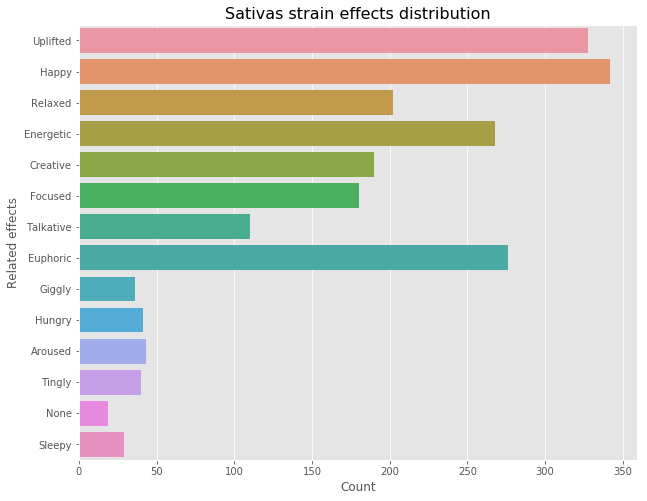

In [71]:
#Creating the counting of effects
sativa_effects = get_effects(sativas)

#Let see the distribuition of effects by types
plt.figure(figsize=(10,8))
sns.barplot(list(sativa_effects.values()), list(sativa_effects.keys()), orient='h')
plt.xlabel("Count", fontsize=12)
plt.ylabel("Related effects", fontsize=12)
plt.title("Sativas strain effects distribution", fontsize=16)
plt.show()


<h2>Indicas effects</h2>

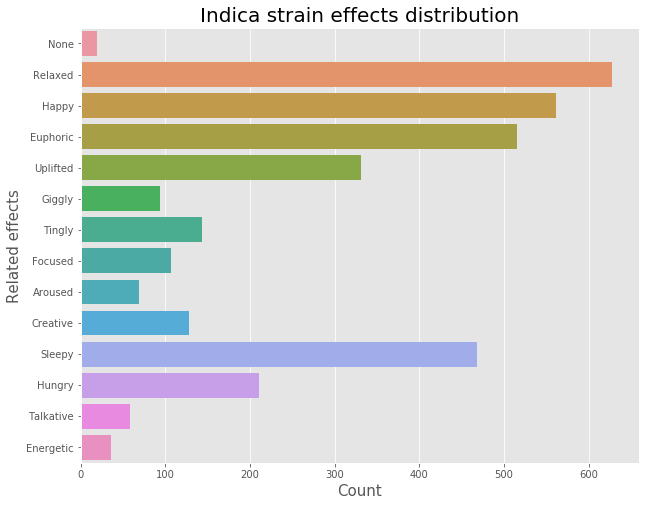

In [72]:
# Couting effects of indicas 
indica_effects = get_effects(indicas)

# Ploting Indica Effects
plt.figure(figsize=(10,8))
sns.barplot(list(indica_effects.values()),list(indica_effects.keys()), orient='h')
plt.xlabel("Count", fontsize=15)
plt.ylabel("Related effects", fontsize=15)
plt.title("Indica strain effects distribution", fontsize=20)
plt.show()

<h2>Hibrids flavors</h2>

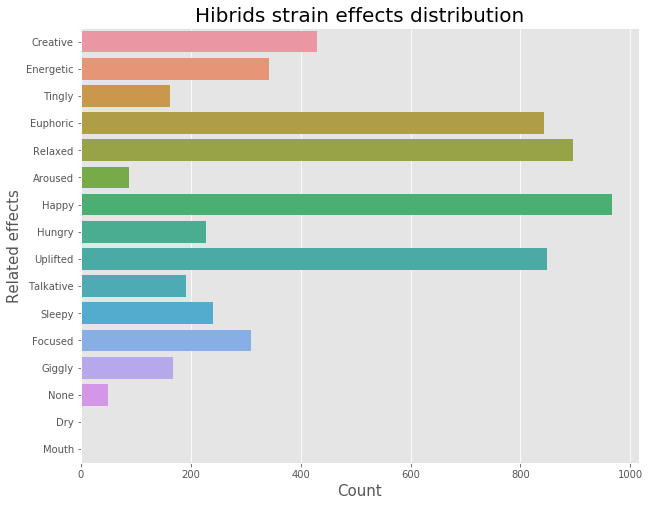

In [73]:
hibridas_effects = get_effects(hibridas)

# Ploting Hybrid effects
plt.figure(figsize=(10,8))
sns.barplot(list(hibridas_effects.values()),list(hibridas_effects.keys()), orient='h')
plt.xlabel("Count", fontsize=15)
plt.ylabel("Related effects", fontsize=15)
plt.title("Hibrids strain effects distribution", fontsize=20)
plt.show()


<a id="Observations"></a> <br> 
# **5. Some observations:** 

<h2>Some observations:</h2>  <br> 
We can clearly see that Happy, Uplified, Relaxed, Euphoric have a high ranking at all 3 types <br>
<br>
Its interesting that almost 350 people of 440 in <b>Sativas</b> related Happy and Uplifted Effects <br> 
- 'Happy': 342<br> 
- 'Uplifted': 328<br> 
- 'Euphoric': 276<br> 
- 'Energetic': 268<br> 

78% has described Happy to Sativas strains<br>
 
<b>Indicas</b> we have 699 votes and Relaxed with most frequency at distribuition:  <br> 
- 'Relaxed': 628<br> 
- 'Happy': 562<br> 
- 'Euphoric': 516<br> 

90% has described Relaxed to Indica strains <br>

<b>Hybrids</b> We have 1212 votes and distribuition of effects is 
- 'Happy': 967
- 'Relaxed': 896
- 'Uplifted': 848
- 'Euphoric': 843

80% has described Happy and 74% related Relaxed to Hybrids strains <br>
<b>Very Interesting!</b>        
<br>
We also need to remember that's possible to vote in more than 1 effect or flavor in each vote. 

<a id="FlavandEffect"></a> <br> 
# **6. Exploring general Flavors and Effects:** 

<h2>Now, let's check the flavors <br></h2>
I will use the same loop to known the most related flavors

In [74]:
#Creating flavors to cut each flavor by row -- inspired in LiamLarsen --
def flavors(df):
    ret_dict = {}
    for list_ef in df.Flavor.dropna():
        flavors_list = list_ef.split(',')
        for flavor in flavors_list:
            if not flavor in ret_dict:
                ret_dict[flavor] = 1
            else:
                ret_dict[flavor] += 1
    return ret_dict

<h2>Sativas Flavors</h2>

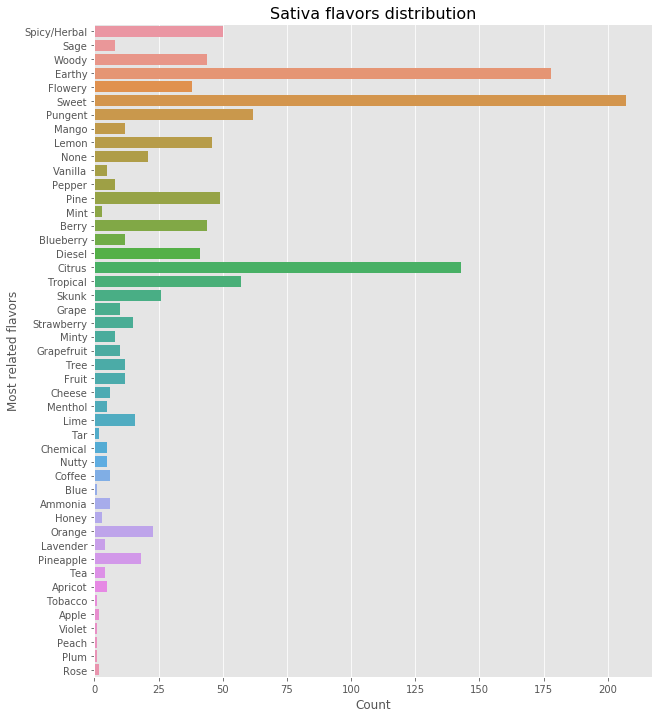

In [75]:
#Runing flavors counts to sativas
sativa_flavors = flavors(sativas)

plt.figure(figsize=(10,12))
sns.barplot(list(sativa_flavors.values()),list(sativa_flavors.keys()), orient='h')
plt.xlabel("Count", fontsize=12)
plt.ylabel("Most related flavors", fontsize=12)
plt.title("Sativa flavors distribution", fontsize=16)
plt.show()

Most frequent flavors in Sativas: <br>
Sweet: 207 <br>
Earthy: 178 <br>
Citrus: 143 <br>

<h2>Indicas Flavors</h2>

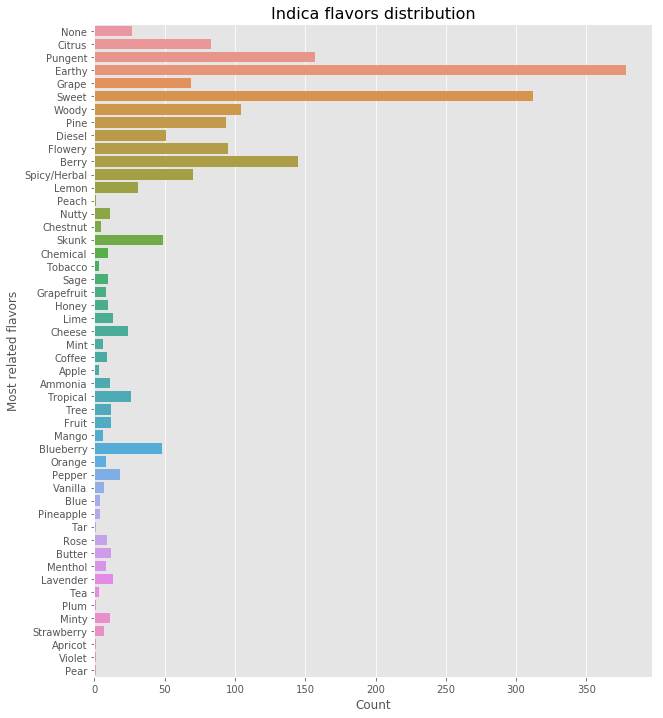

In [76]:
indica_flavors = flavors(indicas)

plt.figure(figsize=(10,12))
sns.barplot(list(indica_flavors.values()),list(indica_flavors.keys()), orient='h')
plt.xlabel("Count", fontsize=12)
plt.ylabel("Most related flavors",fontsize=12)
plt.title("Indica flavors distribution", fontsize=16)
plt.show()

Most frequent values in indicas <br>
Earthy: 378 <br>
Sweet: 312 <br>
Pungent: 157 <br> 
Berry: 145 <br>

<h2> Hibrids flavors</h2>

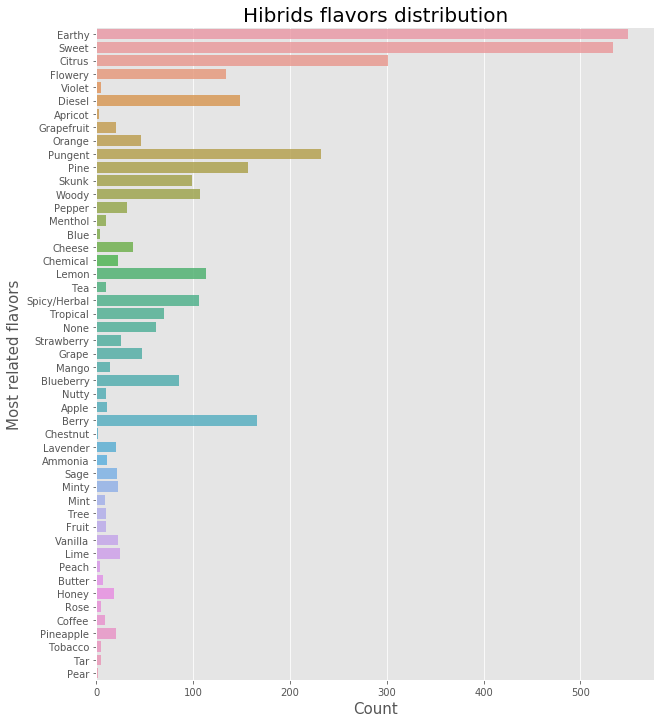

In [77]:
#Getting hibridas flavors
hibridas_flavors = flavors(hibridas)

plt.figure(figsize=(10,12))
sns.barplot(list(hibridas_flavors.values()),list(hibridas_flavors.keys()), alpha=0.8,orient='h')
plt.xlabel("Count", fontsize=15)
plt.ylabel("Most related flavors", fontsize=15)
plt.title("Hibrids flavors distribution", fontsize=20)
plt.show()

The most frequent values in Hybrid type is: <br>
Earthy: 549<br>
Sweet: 534<br>
Citrus: 301   <br>

<h2>Librarys to WordCloud</h2>

In [78]:
from wordcloud import WordCloud, STOPWORDS
import nltk.tokenize as word_tokenize
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
import re
from nltk.stem.porter import *
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction import stop_words

<h1>Word Clouds</h1>

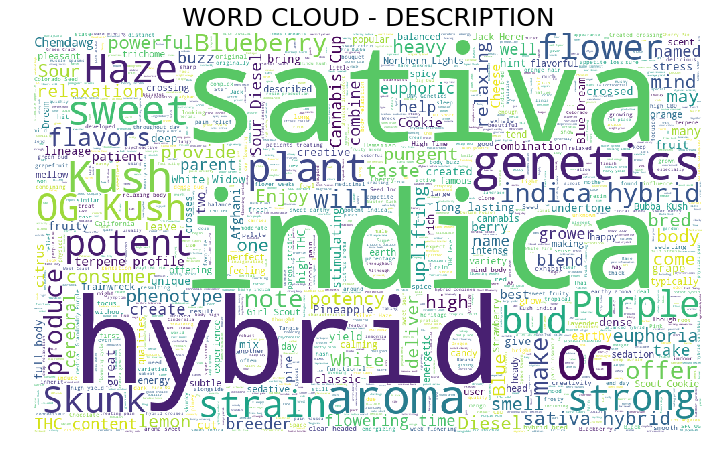

In [79]:
stopwords = set(STOPWORDS)
newStopWords = ['strain','effect', 'genetic', 'effects','flavor',
                'dominant','known','cross']
stopwords.update(newStopWords)

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=1500,
                          max_font_size=200, 
                          width=1000, height=600,
                          random_state=42,
                         ).generate(" ".join(strains['Description'].astype(str)))

fig = plt.figure(figsize = (12,12))
plt.imshow(wordcloud)
plt.title("WORD CLOUD - DESCRIPTION", fontsize=25)
plt.axis('off')
plt.show()

<h2>Word Cloud Sativas</h2>

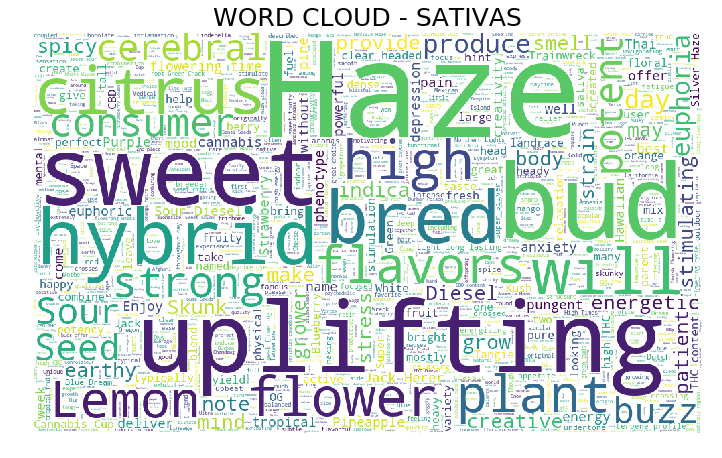

In [80]:
stopwords = set(STOPWORDS)
newStopWords = ['strain','effect', 'genetic', 'sativa', 'effects',
                'aroma','flavor','dominant','known','cross','genetics']
stopwords.update(newStopWords)

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=1500,
                          max_font_size=200, 
                          width=1000, height=600,
                          random_state=42,
                         ).generate(" ".join(strains[strains.Type == 'sativa']['Description'].astype(str)))

fig = plt.figure(figsize = (12,12))
plt.imshow(wordcloud)
plt.title("WORD CLOUD - SATIVAS", fontsize=25)
plt.axis('off')
plt.show()

<h2>Word Cloud Indicas</h2>

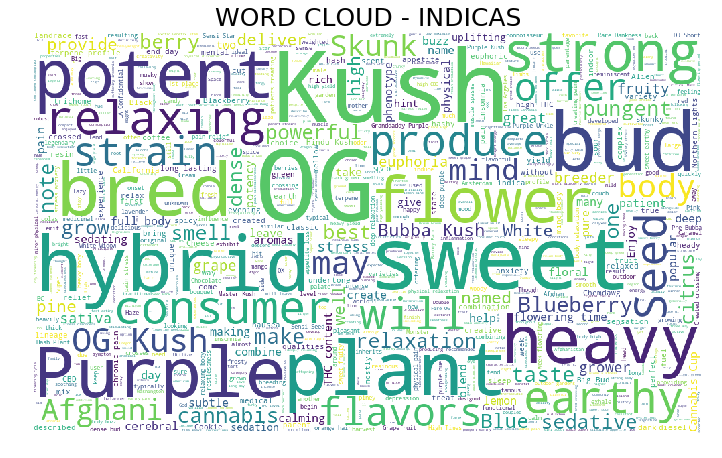

In [81]:
stopwords = set(STOPWORDS)
newStopWords = ['strain','effect', 'genetic', 'indica', 'effects','aroma', 
                'genetics','flavor','dominant','known','cross']
stopwords.update(newStopWords)

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=1500,
                          max_font_size=150, 
                          width=1000, height=600,
                          random_state=42,
                         ).generate(" ".join(strains[strains.Type == 'indica']['Description'].astype(str)))

fig = plt.figure(figsize = (12,12))
plt.imshow(wordcloud)
plt.title("WORD CLOUD - INDICAS", fontsize=25)
plt.axis('off')
plt.show()

<h2>Word Cloud Hybrids</h2>

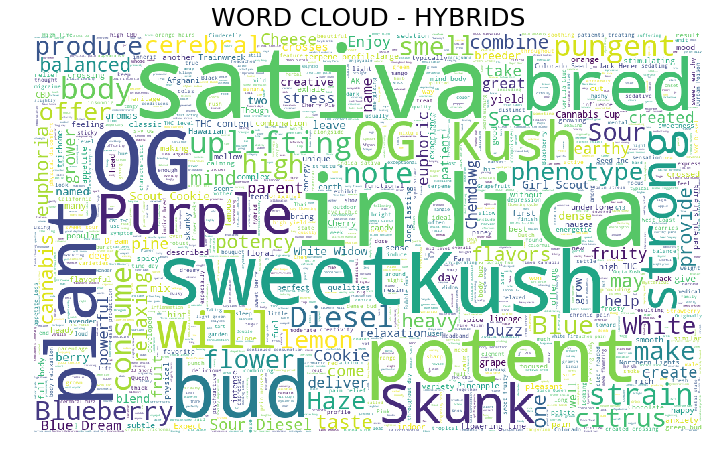

In [82]:
stopwords = set(STOPWORDS)
newStopWords = ['strain','effect', 'genetic', 'hybrid', 'effects', 'aroma',
                'genetics', 'flavor', 'genetics','cross','dominant','known']
stopwords.update(newStopWords)

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=1500,
                          max_font_size=150, 
                          width=1000, height=600,
                          random_state=42,
                         ).generate(" ".join(strains[strains.Type == 'hybrid']['Description'].astype(str)))

fig = plt.figure(figsize = (12,12))
plt.imshow(wordcloud)
plt.title("WORD CLOUD - HYBRIDS", fontsize=25)
plt.axis('off')
plt.show()

<h2>Word Cloud Rating 5 Strains</h2>

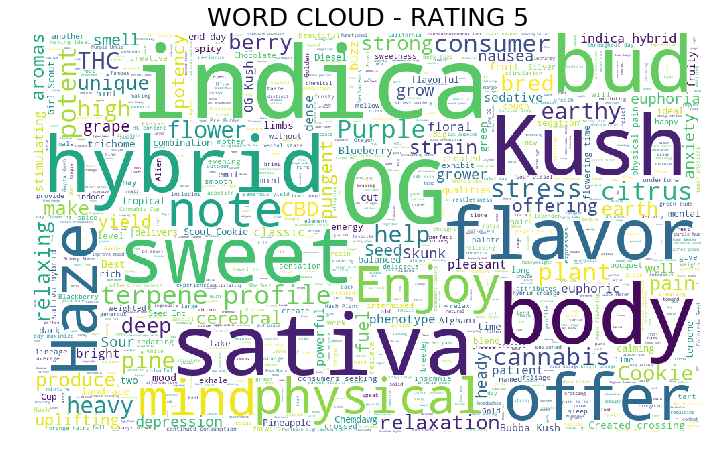

In [83]:
stopwords = set(STOPWORDS)
newStopWords = ['strain','effect', 'genetic','effects','cross','genetics',
                'aroma','consumer','known','dominant']
stopwords.update(newStopWords)

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=1500,
                          max_font_size=150, 
                          width=1000, height=600,
                          random_state=42,
                         ).generate(" ".join(strains[strains.Rating == 5]['Description'].astype(str)))

fig = plt.figure(figsize = (12,12))
plt.imshow(wordcloud)
plt.title("WORD CLOUD - RATING 5", fontsize=25)
plt.axis('off')
plt.show()


very interesting and meaningful Word clouds 


<a id="Preprocess"></a> <br> 
# **7. Preprocessing dataset:** 

<h1>Knowing all this...Let's get high! </h1>
<h2>and try to predict the type of strain using flavors, effects and rating? 

In [84]:
#Lets do some transformation in data

print(strains.head())

           Strain    Type  Rating  \
0          100-Og  hybrid     4.0   
1  98-White-Widow  hybrid     4.7   
2            1024  sativa     4.4   
3        13-Dawgs  hybrid     4.2   
4        24K-Gold  hybrid     4.6   

                                         Description  Effect_1   Effect_2  \
0  $100 OG is a 50/50 hybrid strain that packs a ...  Creative  Energetic   
1  The ‘98 Aloha White Widow is an especially pot...   Relaxed    Aroused   
2  1024 is a sativa-dominant hybrid bred in Spain...  Uplifted      Happy   
3  13 Dawgs is a hybrid of G13 and Chemdawg genet...    Tingly   Creative   
4  Also known as Kosher Tangie, 24k Gold is a 60%...     Happy    Relaxed   

   Effect_3   Effect_4   Effect_5      Flavor_1 Flavor_2    Flavor_3  
0    Tingly   Euphoric    Relaxed        Earthy    Sweet      Citrus  
1  Creative      Happy  Energetic       Flowery   Violet      Diesel  
2   Relaxed  Energetic   Creative  Spicy/Herbal     Sage       Woody  
3    Hungry    Relaxed   Uplif

In [85]:
#Transformin the Type in numerical 
strains["Type"] = pd.factorize(strains["Type"])[0]
del strains["Description"]
# Now we have 3 numerical Types
# 0 - Hybrid
# 1 - Sativa
# 2 - Indica

In [86]:
# Creating the dummies variable of Effects and Flavors
#effect_dummy = strains['Effects'].str.get_dummies(sep=',',)
#flavor_dummy = strains['Flavor'].str.get_dummies(sep=',')

dummy = pd.get_dummies(strains[['Effect_1','Effect_2','Effect_3','Effect_4','Effect_5','Flavor_1','Flavor_2','Flavor_3']])

In [87]:
#Concatenating the result and droping the used variables 
strains = pd.concat([strains, dummy], axis=1)

strains = strains.drop(['Strain','Effect_1','Effect_2','Effect_3','Effect_4','Effect_5','Flavor_1','Flavor_2','Flavor_3'], axis=1)

strains.shape

(2351, 232)

<a id="Modeling"></a> <br> 
# **8. Importing Sklearn and Modeling:** 

In [88]:
#Importing the prediction librarys 

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.cross_validation import cross_val_score

In [89]:
# setting X and y
X = strains.drop("Type",1).values
y = strains["Type"].values

X = X.astype(np.float64, copy=False)
y = y.astype(np.float64, copy=False)

In [90]:
#Spliting the variables in train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# Creating the RandomForest 
rf = RandomForestClassifier(n_estimators=10)

# running the model
rf.fit(X, y)

# Printing the Training Score
print("Training score data: ")
print(rf.score(X, y))

Training score data: 
0.9655465759251383


<a id="Evaluation"></a> <br> 
# **9. Evaluating the model prediction:** 

Legend of the prediction
- 0 hybrid
- 1 sativa
- 2 Indica

In [91]:
# Predicting with X_test
y_pred = rf.predict(X_test)

# Print the results
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9730878186968839
[[371   0   2]
 [  7 122   0]
 [ 10   0 194]]
             precision    recall  f1-score   support

        0.0       0.96      0.99      0.98       373
        1.0       1.00      0.95      0.97       129
        2.0       0.99      0.95      0.97       204

avg / total       0.97      0.97      0.97       706



It's backing overfit


In [92]:
score_train = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy',)
print(score_train.mean())

0.5902757241029166


In [93]:
score_train = cross_val_score(rf, X_test, y_test, cv=5, scoring='accuracy',)
print(score_train.mean())

0.5692561922892013


:( 

Let's try predict using <b>Logistic regression</b> and verify how it works 

In [94]:
#Creating weights to the class
class_weight = {1:0.5, 0:0.5}

# Creating the Logistic Regression 
logreg = LogisticRegression(class_weight=class_weight)

# Running the model
logreg.fit(X, y)

# Printing the Training Score
print("Training score data: ")
print(logreg.score(X, y))

Training score data: 
0.6877924287537218


In [95]:
# Predicting X_test with logistic
y_pred = logreg.predict(X_test)

# Verificaar os resultados obtidos
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.6912181303116147
[[289  20  64]
 [ 75  52   2]
 [ 54   3 147]]
             precision    recall  f1-score   support

        0.0       0.69      0.77      0.73       373
        1.0       0.69      0.40      0.51       129
        2.0       0.69      0.72      0.71       204

avg / total       0.69      0.69      0.68       706



In [96]:
#Lets validate the prediction again

In [97]:
score_train = cross_val_score(logreg, X_train, y_train, cv=5, scoring='accuracy',)
print(score_train.mean())

0.6157912732484606


In [98]:
score_train = cross_val_score(logreg, X_test, y_test, cv=5, scoring='accuracy',)
print(score_train.mean())

0.603240104949304


<h3> This waw my second submission on Kaggle, please comment below and let me know what you think about my notebook exploration

Sory about any english error